In [88]:
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
import os

In [89]:
num_classes = 4
img_rows,img_cols = 48,48
batch_size = 128

train_data_dir = '/Users/kaifh/Desktop/Emotion detector/Data/test'
validation_data_dir = '/Users/kaifh/Desktop/Emotion detector/Data/train'

In [90]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [91]:
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(img_rows,img_cols),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            color_mode='grayscale',
                            target_size=(img_rows,img_cols),
                            batch_size=batch_size,
                            class_mode='categorical',
                            shuffle=True)

model = Sequential()

Found 5212 images belonging to 4 classes.
Found 21005 images belonging to 4 classes.


In [92]:
# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_88 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_95 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_89 (Batc (None, 24, 24, 128)     

In [93]:
checkpoint = ModelCheckpoint('/Users/kaifh/Desktop/Emotion detector/Emotion_detector.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [94]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [95]:
nb_train_samples = 5212
nb_validation_samples = 21005
epochs=30

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)


Epoch 1/30
40/40 [==============================] - 129s 3s/step - loss: 1.5961 - accuracy: 0.2821 - val_loss: 1.4264 - val_accuracy: 0.3433

Epoch 00001: val_loss improved from inf to 1.42639, saving model to /Users/kaifh/Desktop/Emotion detector\Emotion_detector.h5
Epoch 2/30
40/40 [==============================] - 127s 3s/step - loss: 1.5119 - accuracy: 0.2978 - val_loss: 1.4385 - val_accuracy: 0.3464

Epoch 00002: val_loss did not improve from 1.42639
Epoch 3/30
40/40 [==============================] - 127s 3s/step - loss: 1.4858 - accuracy: 0.2911 - val_loss: 1.4337 - val_accuracy: 0.2298

Epoch 00003: val_loss did not improve from 1.42639
Epoch 4/30
40/40 [==============================] - 127s 3s/step - loss: 1.4377 - accuracy: 0.3114 - val_loss: 1.3887 - val_accuracy: 0.2441

Epoch 00004: val_loss improved from 1.42639 to 1.38868, saving model to /Users/kaifh/Desktop/Emotion detector\Emotion_detector.h5
Epoch 5/30
40/40 [==============================] - 127s 3s/step - loss: 1

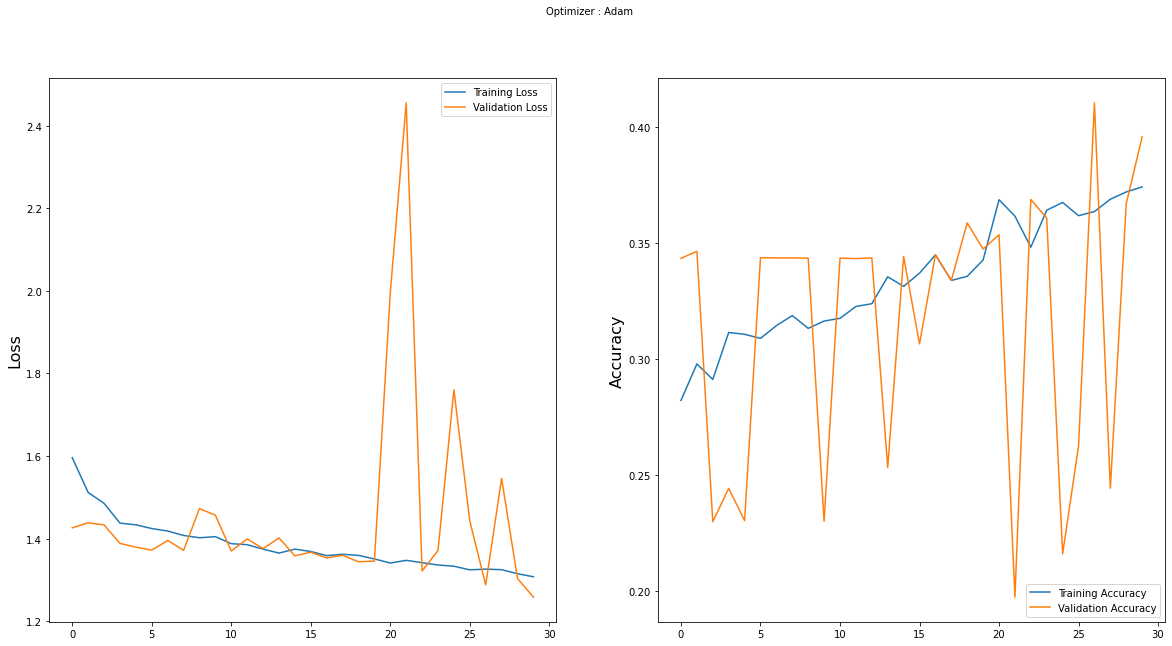

In [96]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()